In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/archive (3).zip','r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
data_path='/content/Multi-class Weather Dataset'

In [ ]:
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5,1.5),
    channel_shift_range=0.2,
    zca_whitening=False, # Changed to False as it's often problematic and requires fit()
    featurewise_center=False,
    featurewise_std_normalization=False
)

train=datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 901 images belonging to 4 classes.


In [ ]:
test=datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 224 images belonging to 4 classes.


In [ ]:
print(f"Number of images: {train.n}")
print(f"Image shape: {train.image_shape}")
print(f"Number of classes: {train.num_classes}")

Number of images: 901
Image shape: (224, 224, 3)
Number of classes: 4


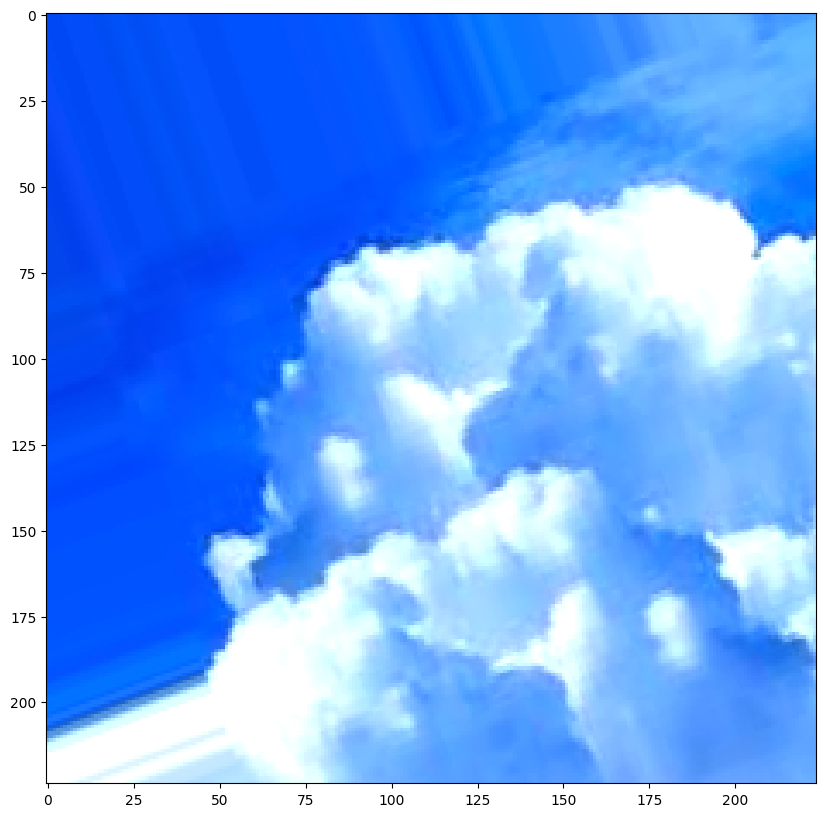

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
plt.imshow(train[1][0][8])

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(4,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,810,884 (37.43 MB)

 Trainable params: 9,810,884 (37.43 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history=model.fit(train,validation_data=test,epochs=3)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 782s 27s/step - accuracy: 0.9838 - loss: 0.0716 - val_accuracy: 0.8571 - val_loss: 0.4419
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 779s 27s/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.8661 - val_loss: 0.4179
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 772s 27s/step - accuracy: 0.9873 - loss: 0.0466 - val_accuracy: 0.9152 - val_loss: 0.2412


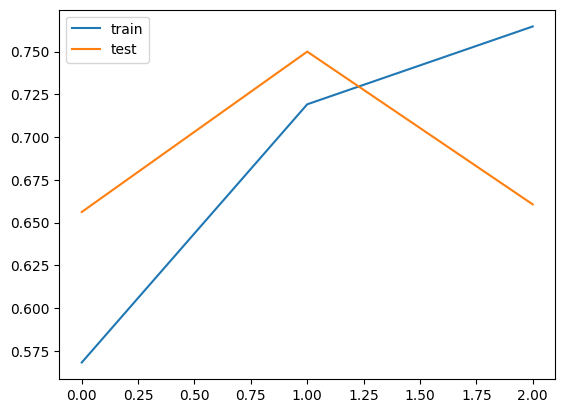

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

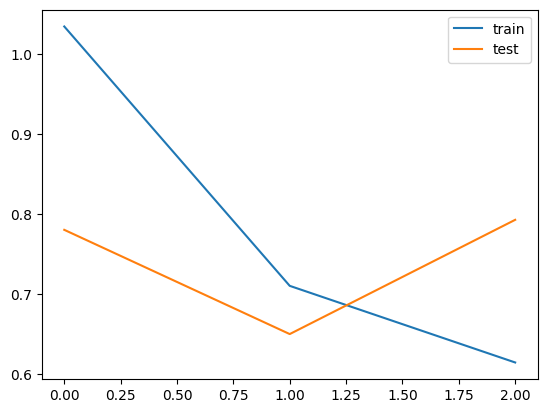

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [ ]:
base=tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    input_tensor=None,
    pooling='avg',
    classes=4,
    classifier_activation='softmax',
    name="densenet121",
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Sequential([
    base,
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.15),
    Dense(256,activation='relu'),
    Dropout(0.15),
    Dense(4,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,694,660 (29.35 MB)

 Trainable params: 7,611,012 (29.03 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train,validation_data=test,epochs=3)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 895s 27s/step - accuracy: 0.5514 - loss: 1.0601 - val_accuracy: 0.5491 - val_loss: 1.0767
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 784s 27s/step - accuracy: 0.9488 - loss: 0.1971 - val_accuracy: 0.8214 - val_loss: 0.4757
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 785s 27s/step - accuracy: 0.9634 - loss: 0.1216 - val_accuracy: 0.8482 - val_loss: 0.4400


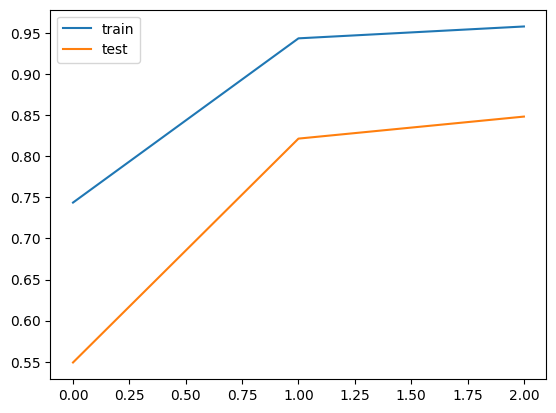

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

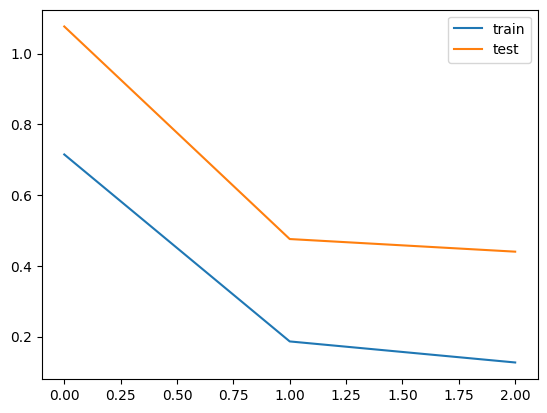

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()